# End to End Time Series forecasting using ARIMA

In [3]:
#Changing working directory
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

C:\Users\91956\OneDrive\Time-Series-Forecast\Final-Exercise


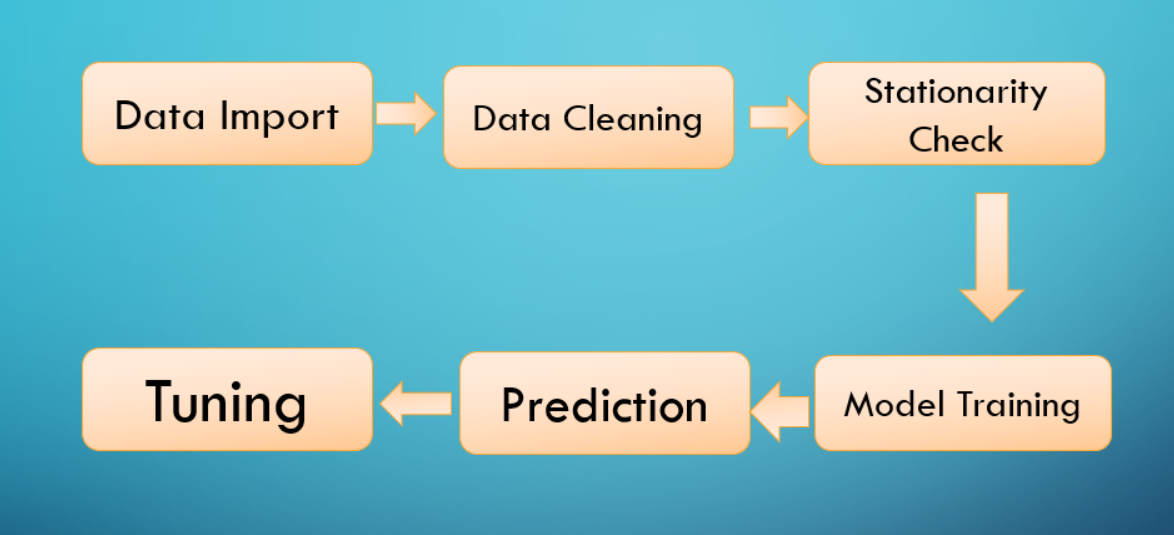

In [4]:
from IPython.display import Image
Image(filename='Capture.png') 

In [5]:
#Data Import and cleaning

In [6]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('HCLTECH.csv')
TempData.head(30)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


In [7]:
#Data Cleaning
HCLTechStockData = TempData.dropna()


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)
  
HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2']
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

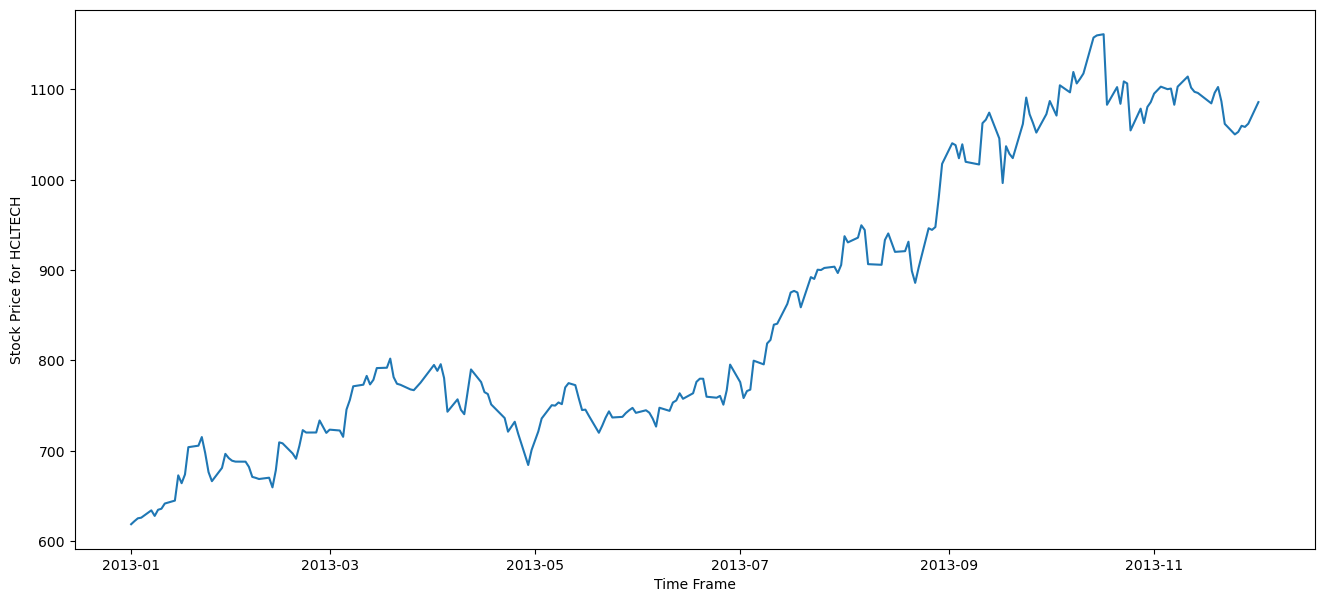

In [8]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

# Checking stationarity

# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

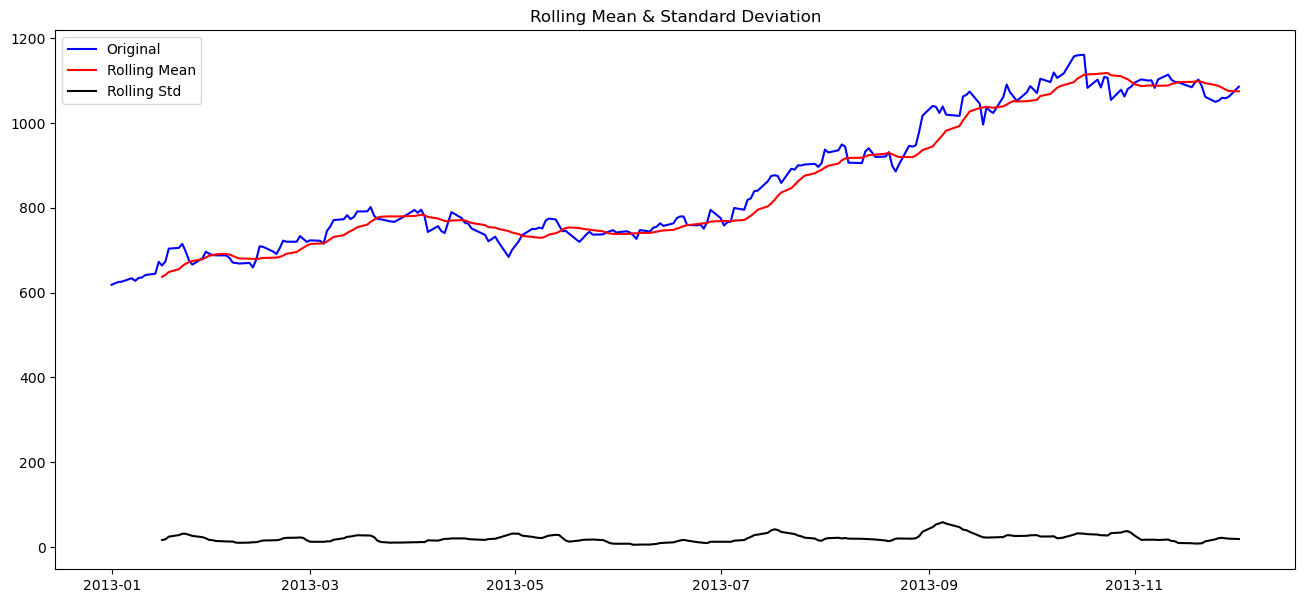

In [9]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# making Series Stationary

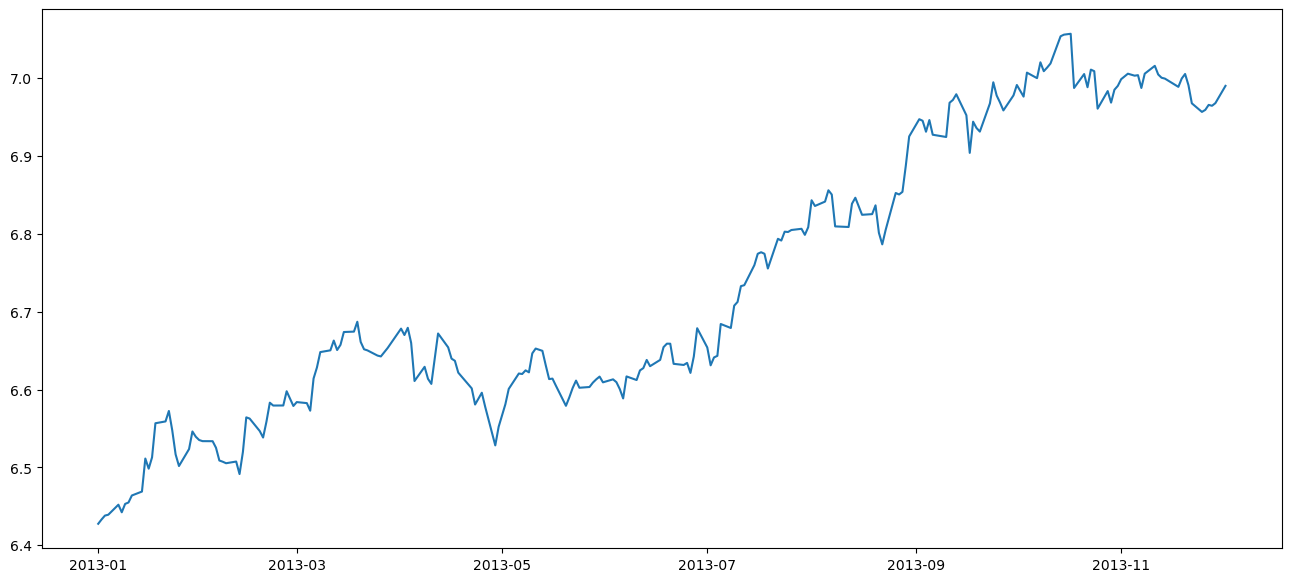

In [10]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

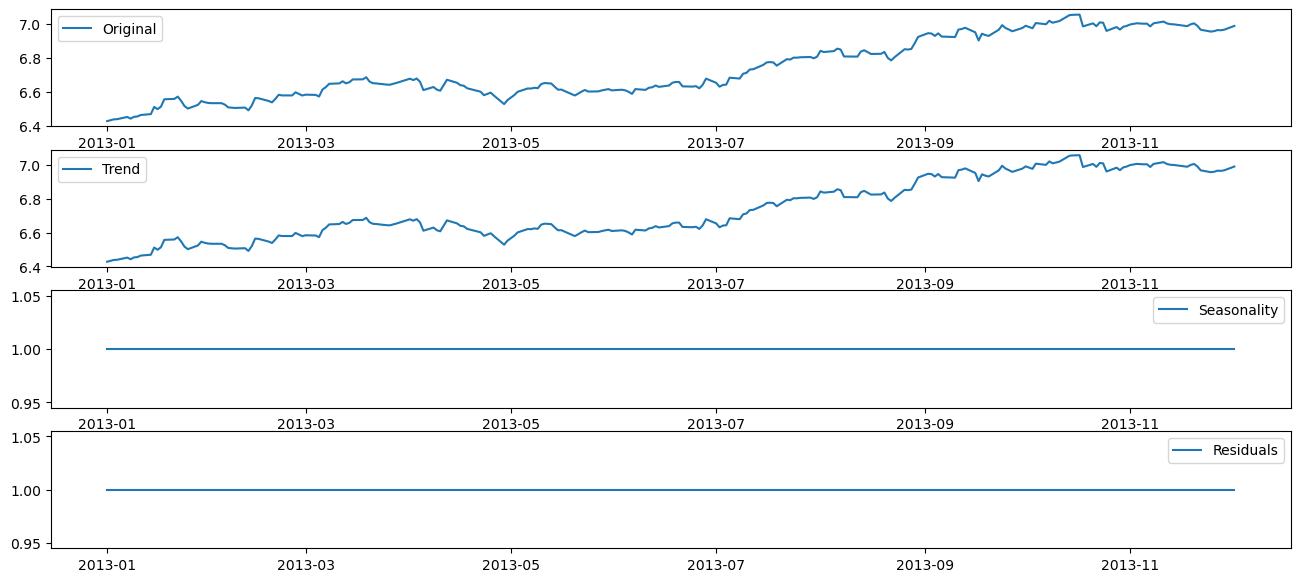

In [11]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,period=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

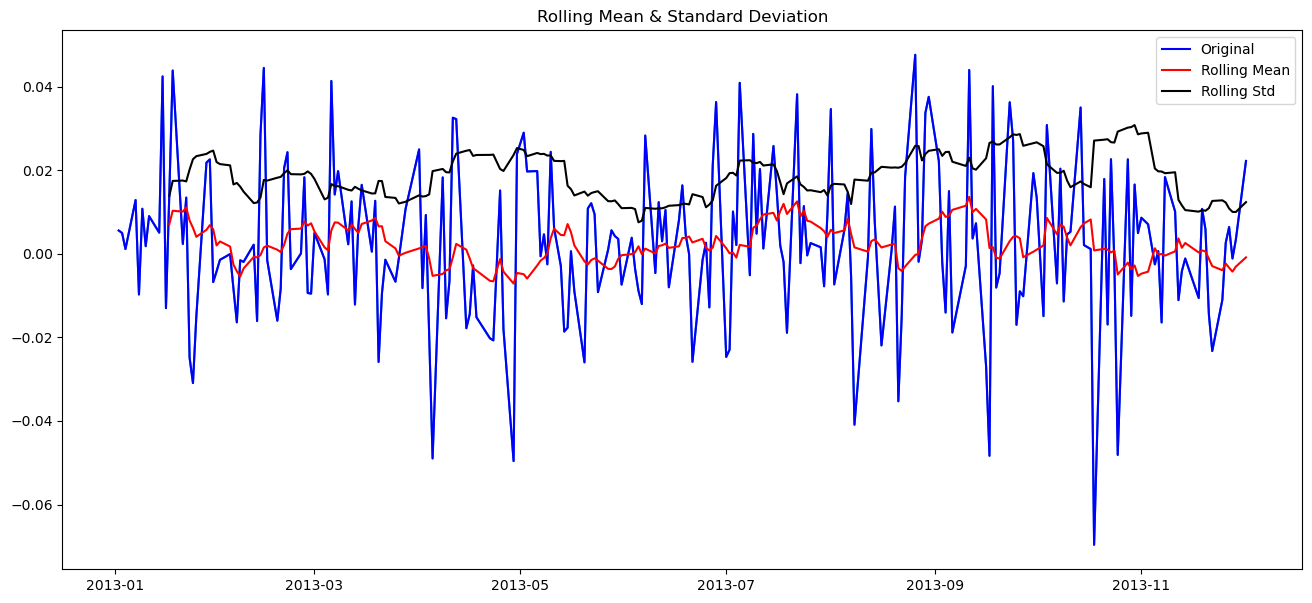

In [12]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [13]:
HCLTechStockData.sort_index(inplace= True)

In [14]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff , nlags=20)
lag_pacf = pacf(ts_log_diff , nlags=20)

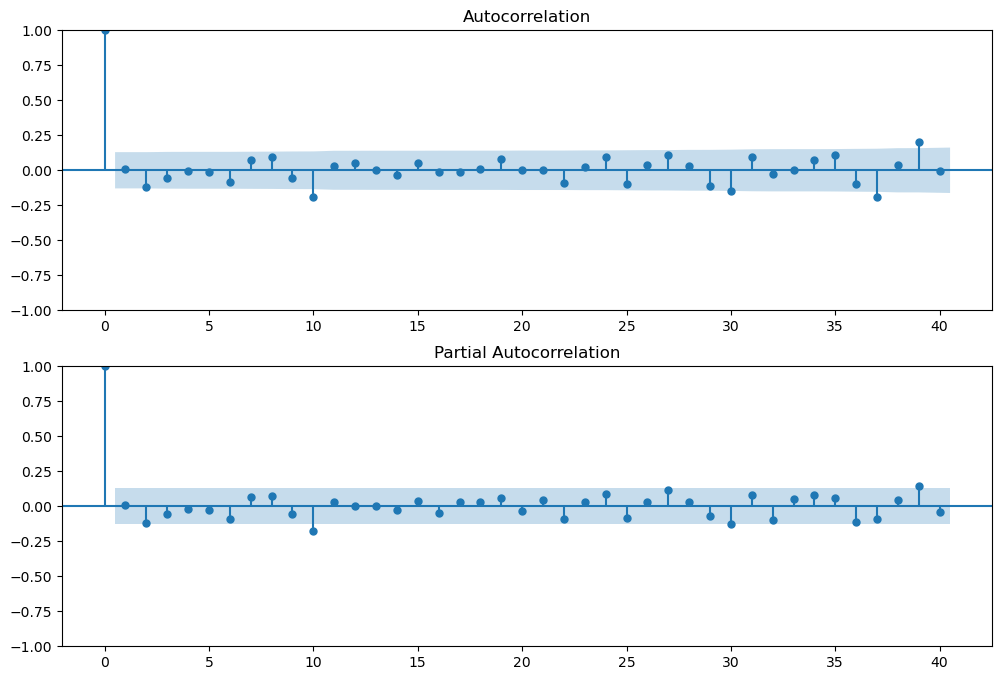

In [15]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
type(ts_log_diff)

pandas.core.series.Series

In [18]:
#ts_log_diff.dropna()
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

C:\Users\91956\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91956\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91956\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91956\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


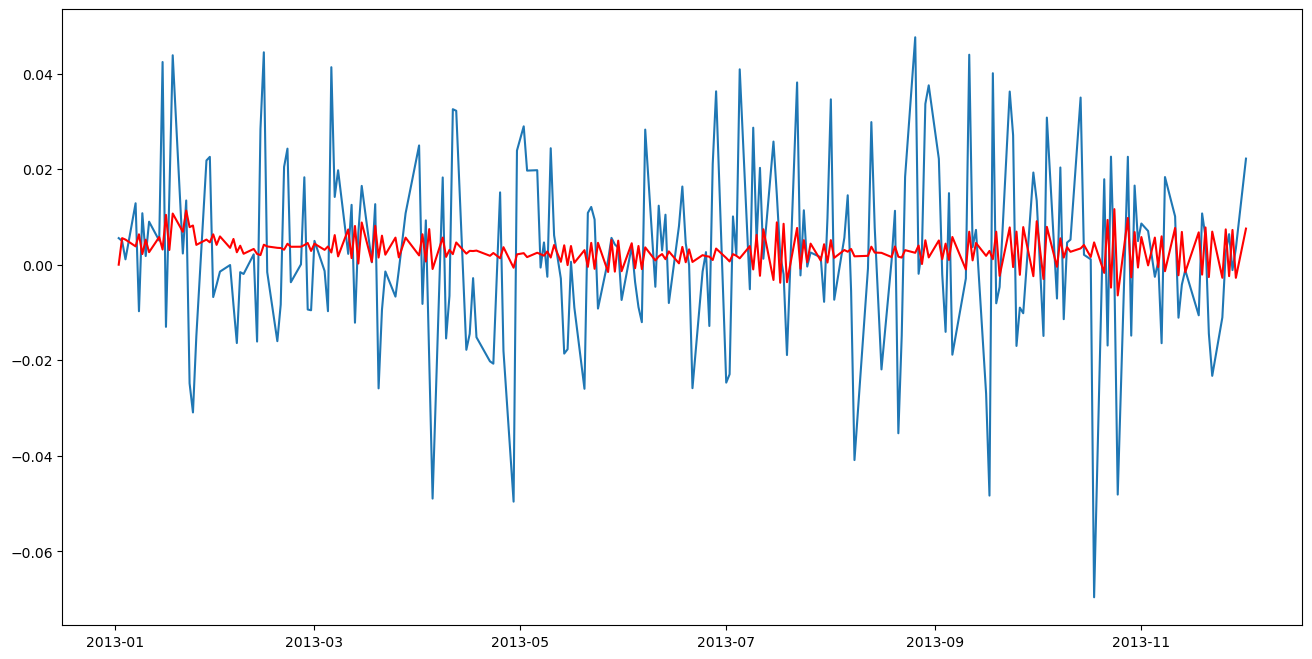

In [19]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA (ts_log_diff, order=(2,1,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

# Taking results back to original scale

In [20]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.005252
2013-01-07    0.003840
2013-01-08    0.006363
dtype: float64


In [21]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02    0.000000
2013-01-03    0.005561
2013-01-04    0.010812
2013-01-07    0.014652
2013-01-08    0.021016
dtype: float64


In [22]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.433181
2013-01-04    6.438433
2013-01-07    6.442273
dtype: float64

Text(0.5, 1.0, 'RMSE: 93.5366')

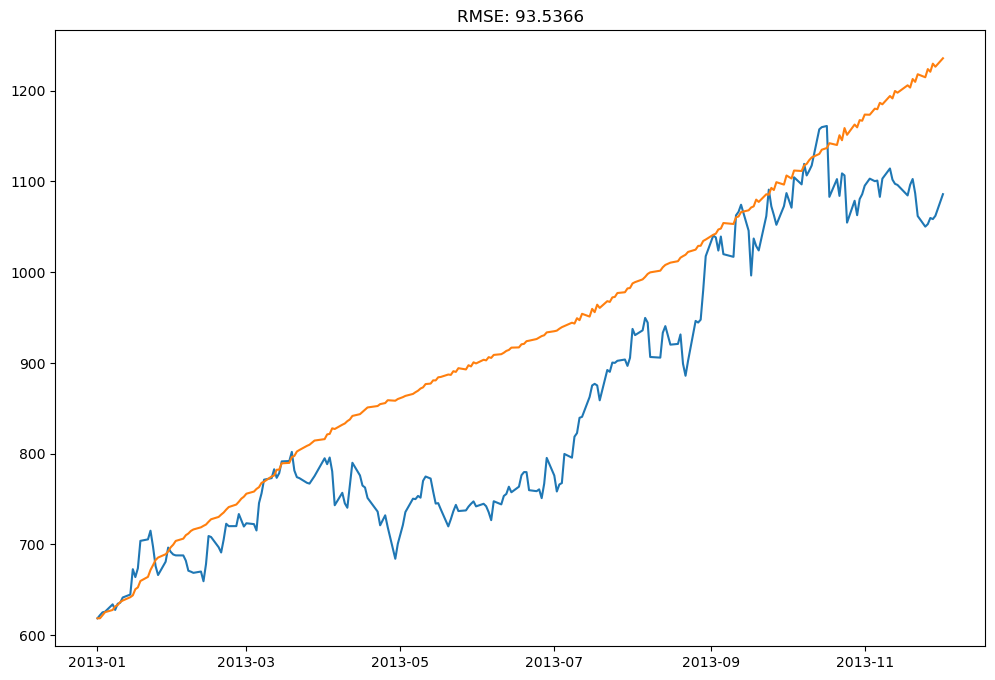

In [23]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [24]:
results_ARIMA.predict(10,20)

Date
2013-01-16    0.010433
2013-01-17    0.003080
2013-01-18    0.010708
2013-01-21    0.006893
2013-01-22    0.011336
2013-01-23    0.007860
2013-01-24    0.008204
2013-01-25    0.004149
2013-01-28    0.005255
2013-01-29    0.004679
2013-01-30    0.006356
Name: predicted_mean, dtype: float64

In [25]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\91956\anaconda3\lib\site-packages\gscraper-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [26]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [27]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1159.008, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.428 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)